In [1]:
using Revise
using Pkg; Pkg.activate(".")

using Dates
using Statistics
# using Interpolations
using DSP
using FFTW
using NCDatasets
using JLD2
using Printf

include("./read_lidar.jl")
using .read_lidar
# using MAT

using PyPlot

  Activating project at `~/Projects/ASTRAL/lidar`


In [2]:
m2n(x) = ismissing(x) ? NaN : x
pd = permutedims

"lidar beam range"
rng(iz, rangegate=24.0) = rangegate * (iz-1 + 0.5)

rng

In [3]:
epsdir = "./epsilon_data"
files = filter(f -> startswith(f, "epsilon_2024") & endswith(f, ".jld2") , readdir(epsdir))

nf = length(files)
epsi = Vector{Matrix{Union{Missing, Float64}}}(undef, nf)
start_dt = Vector{Any}(undef, nf)
end_dt = Vector{Any}(undef, nf)

c = 0
for f in files
    c += 1
    epsi[c] = load(joinpath(epsdir, f))["epsilon"]
end

# load times
c = 0
for f in filter(f -> startswith(f, "staredt_2024") & endswith(f, ".jld2") , readdir(epsdir))
    c += 1
    d = load(joinpath(epsdir, f))
    tmp = d["start_dt"]
    start_dt[c] = tmp
    end_dt[c] = d["end_dt"]
end

In [4]:
start_dt[1]

115-element Vector{DateTime}:
 2024-04-29T00:04:03.688
 2024-04-29T00:14:03.898
 2024-04-29T00:24:04.118
 2024-04-29T00:34:04.408
 2024-04-29T00:44:04.828
 2024-04-29T02:04:05.298
 2024-04-29T02:14:05.718
 2024-04-29T02:24:06.088
 2024-04-29T02:34:06.178
 2024-04-29T02:44:05.688
 ⋮
 2024-04-30T20:14:44.264
 2024-04-30T20:24:44.560
 2024-04-30T20:34:44.864
 2024-04-30T20:44:45.160
 2024-04-30T22:04:46.168
 2024-04-30T22:14:46.544
 2024-04-30T22:24:46.864
 2024-04-30T22:34:47.160
 2024-04-30T22:44:47.512

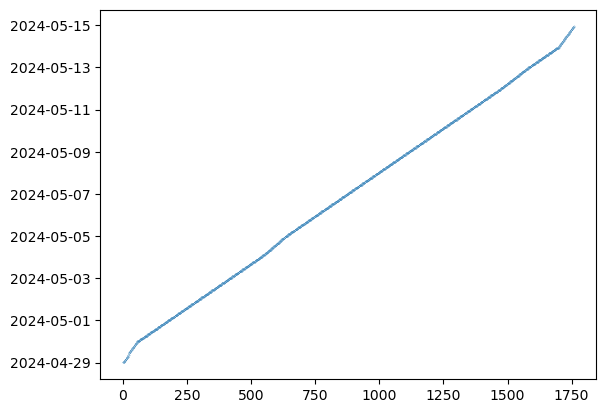

In [5]:
# map(x -> cat(x, dims=1), epsi)
flt(ep) = m2n(ep) >= 0 ? ep : NaN
nt = size(vcat(epsi...), 1)

start_time = vcat(start_dt...)
end_time = vcat(end_dt...)
# uit = findfirst.(isequal.(unique(start_time)), [start_time]) # already unique
sit = sortperm(start_time)
clf()
plot(start_time[sit], marker=".", markersize=0.3, linestyle="none")
gcf()

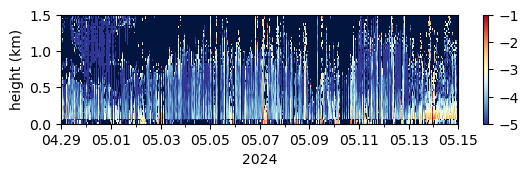

In [ ]:

clf()
subplot(3,1,1)
# pcolormesh((1:nt)/115, rng.(1:80)/1e3, log10.(pd(flt.(vcat(epsi...)))), cmap=ColorMap("RdYlBu_r"), vmin=-6, vmax=0)
pcolormesh(start_time[sit], rng.(1:80)/1e3, log10.(pd(flt.(vcat(epsi...))[sit,:])), cmap=ColorMap("RdYlBu_r"), vmin=-5, vmax=-1)
colorbar(ticks = -1:-1:-5, ticklabels=)
ylim([0, 1.5])
ylabel("height (km)")
xlim([Date(2024,4,29), Date(2024,5,15)])
xlabel("2024")

ax = gca()
ax.xaxis.set_major_formatter(PyPlot.matplotlib.dates.DateFormatter("%m.%d"))
mx = PyPlot.matplotlib.ticker.MultipleLocator(1) # Define interval of minor ticks
ax.xaxis.set_minor_locator(mx) # Set interval of minor ticks
ax.set_facecolor("xkcd:navy")

savefig("epsilon_leg1.pdf")
gcf()


In [5]:
f = files[2]
epsi = load(joinpath(epsdir, f))["epsilon"]

clf()
pcolormesh((1:size(epsi,1))*24/115, rng.(1:80)/1e3, log10.(pd(m2n.(epsi))), cmap=ColorMap("RdYlBu_r"))
colorbar()
xlabel("time, hour-ish")
ylabel("height (km)")

PyObject Text(0, 0.5, 'height (km)')